# 빌릴 땐 마음대로지만 반납할 땐 아니란다
by Sean Park, 20-04-16  
[블로그](https://sean-parkk.github.io?utm_source=nbviewer&utm_medium=referral&utm_content=home)  
[Github](https://github.com/Sean-Parkk)
> *성수동에는 따릉이가 정말 많다.*  
카페 거리, 서울숲 산책, 한강 자전거길 등 주변에 자전거로 즐길 콘텐츠가 많아서 일 것이다.  
반면, 성수동에서 따릉이를 타고 본가인 쌍문동까지 가면, 따릉이를 반납할 곳이 참 없다고 느꼈었다.  
**지역마다 따릉이 분포가 어떤지** 살펴보고, **어느 구역에 확충하면 좋을 지** 살펴보자.

* 목적: 구별 따릉이 분포 분석하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-가져오기" data-toc-modified-id="1.-데이터-가져오기-1">1. 데이터 가져오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2-1.-데이터-병합" data-toc-modified-id="2-1.-데이터-병합-2.1">2-1. 데이터 병합</a></span></li><li><span><a href="#2-2.-결측값-처리" data-toc-modified-id="2-2.-결측값-처리-2.2">2-2. 결측값 처리</a></span></li><li><span><a href="#2-3.-station컬럼-처리,-id컬럼-추가" data-toc-modified-id="2-3.-station컬럼-처리,-id컬럼-추가-2.3">2-3. station컬럼 처리, id컬럼 추가</a></span></li><li><span><a href="#2-4.-컬럼-형식-변경" data-toc-modified-id="2-4.-컬럼-형식-변경-2.4">2-4. 컬럼 형식 변경</a></span><ul class="toc-item"><li><span><a href="#2-4-1.-df_bike" data-toc-modified-id="2-4-1.-df_bike-2.4.1">2-4-1. df_bike</a></span></li><li><span><a href="#2-4-2.-df_station" data-toc-modified-id="2-4-2.-df_station-2.4.2">2-4-2. df_station</a></span></li><li><span><a href="#2-4-3.-컬럼-순서-변경" data-toc-modified-id="2-4-3.-컬럼-순서-변경-2.4.3">2-4-3. 컬럼 순서 변경</a></span></li></ul></li></ul></li><li><span><a href="#3.-데이터-분석" data-toc-modified-id="3.-데이터-분석-3">3. 데이터 분석</a></span><ul class="toc-item"><li><span><a href="#3-1.-따릉이가-많이-배치된-지역-찾기" data-toc-modified-id="3-1.-따릉이가-많이-배치된-지역-찾기-3.1">3-1. 따릉이가 많이 배치된 지역 찾기</a></span><ul class="toc-item"><li><span><a href="#3-1-1.-가장-따릉이가-많이-배치된-대여소는?" data-toc-modified-id="3-1-1.-가장-따릉이가-많이-배치된-대여소는?-3.1.1">3-1-1. 가장 따릉이가 많이 배치된 대여소는?</a></span></li><li><span><a href="#3-1-2.-성동구-내-따릉이-분포-확인해보기" data-toc-modified-id="3-1-2.-성동구-내-따릉이-분포-확인해보기-3.1.2">3-1-2. 성동구 내 따릉이 분포 확인해보기</a></span></li></ul></li><li><span><a href="#3-2.-따릉이를-많이-대여,반납하는-지역-찾기" data-toc-modified-id="3-2.-따릉이를-많이-대여,반납하는-지역-찾기-3.2">3-2. 따릉이를 많이 대여,반납하는 지역 찾기</a></span><ul class="toc-item"><li><span><a href="#3-2-1.-따릉이를-많이-대여하는-구역은?" data-toc-modified-id="3-2-1.-따릉이를-많이-대여하는-구역은?-3.2.1">3-2-1. 따릉이를 많이 대여하는 구역은?</a></span></li><li><span><a href="#3-2-2.-대여가-많으면-반납도-많을까?" data-toc-modified-id="3-2-2.-대여가-많으면-반납도-많을까?-3.2.2">3-2-2. 대여가 많으면 반납도 많을까?</a></span></li><li><span><a href="#3-2-3.-반납-대비-대여가-높은-대여소는?" data-toc-modified-id="3-2-3.-반납-대비-대여가-높은-대여소는?-3.2.3">3-2-3. 반납 대비 대여가 높은 대여소는?</a></span></li><li><span><a href="#3-2-3.-대여가-많은-지역-시각화하기" data-toc-modified-id="3-2-3.-대여가-많은-지역-시각화하기-3.2.4">3-2-3. 대여가 많은 지역 시각화하기</a></span><ul class="toc-item"><li><span><a href="#3-2-3-1.-df_bike-+-df_station" data-toc-modified-id="3-2-3-1.-df_bike-+-df_station-3.2.4.1">3-2-3-1. df_bike + df_station</a></span></li><li><span><a href="#3-2-3-2.-시각화" data-toc-modified-id="3-2-3-2.-시각화-3.2.4.2">3-2-3-2. 시각화</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#4.-결론" data-toc-modified-id="4.-결론-4">4. 결론</a></span></li></ul></div>

## 1. 데이터 가져오기
* 대여소 정보: [링크](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)
    * 19.12.09 기준 데이터를 사용
* 이용 정보: [링크](https://data.seoul.go.kr/dataList/OA-15249/F/1/datasetView.do)
    * 18.12~19.11 간 데이터를 사용 (두 개의 파일 사용)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import folium
import googlemaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', size=14)
plt.rc('font', family='NanumGothic')

In [3]:
# 파일 불러오기
df_rent1 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201906_201911.xlsx', sheet_name='대여')
df_rent2 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201812_201905.xlsx', sheet_name='대여')
df_return1 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201906_201911.xlsx', sheet_name='반납')
df_return2 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201812_201905.xlsx', sheet_name='반납')
df_station = pd.read_excel('source/Seoulbike/서울특별시 공공자전거 대여소 정보(19.12.9).xlsx')

In [4]:
df_rent1.head(3)

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,201906,3909
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2432
2,강남구,2303. 논현역 7번출구,201906,1567


In [5]:
df_rent1.tail(3)

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
9269,중랑구,1457. 동원사거리,201911,577
9270,중랑구,1458. 상봉터미널2,201911,1243
9271,중랑구,1459. 용마한신아파트사거리,201911,339


In [6]:
df_rent2.head(3)

,구분,대여소명,대여일자,대여건수
0,강남구,2301. 현대고등학교 건너편,201812.0,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,500.0
2,강남구,2303. 논현역 7번출구,201812.0,286.0


In [7]:
df_rent2.tail(3)

,구분,대여소명,대여일자,대여건수
9186,중랑구,1457. 동원사거리,201905.0,827.0
9187,중랑구,1458. 상봉터미널2,201905.0,1421.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,447.0


In [8]:
df_return1.head(3)

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201906,4072
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2382
2,강남구,2303. 논현역 7번출구,201906,1402


In [9]:
df_return1.tail(3)

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
9270,중랑구,1457. 동원사거리,201911,572
9271,중랑구,1458. 상봉터미널2,201911,1305
9272,중랑구,1459. 용마한신아파트사거리,201911,316


In [10]:
df_return2.head(3)

,구분,대여소명,반납일자,반납건수
0,강남구,2301. 현대고등학교 건너편,201812.0,437.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,556.0
2,강남구,2303. 논현역 7번출구,201812.0,273.0


In [11]:
df_return2.tail(3)

,구분,대여소명,반납일자,반납건수
9186,중랑구,1457. 동원사거리,201905.0,749.0
9187,중랑구,1458. 상봉터미널2,201905.0,1492.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,320.0


In [12]:
df_station.head(3)

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14


In [13]:
df_station.tail(3)

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
1538,종로구,465.0,465. 삼청공원 앞,서울특별시 종로구 삼청동 25-32,37.587605,126.983597,2019.11.20,5
1539,종로구,664.0,서울시립대 대학본부,동대문구 서울시립대로 163 서울시립대학교,37.584129,127.057938,2019.11.20,10
1540,합계,NaN,1540,NaN,NaN,NaN,NaN,19545


* station 마지막 레코드인 합계를 지워주자.

In [14]:
df_station.drop(1540, axis=0, inplace=True)

## 2. 데이터 전처리

### 2-1. 데이터 병합

* 서로 컬럼명이 다름, 병합을 위해 컬럼명을 맞춰줘야함
* 코딩 편의를 위해 컬럼명 영어로 통일하기!
    * 한글명은 한영키를 한 번 더 눌러줘야해서 오타 확률이 더 높은듯

In [15]:
# 데이터 형태 출력
print(df_rent1.shape,'\n',df_rent2.shape)

(9272, 4) 
 (9189, 4)


In [16]:
# 컬럼명 변경, 데이터 합치기
df_rent1.columns=['district','station','date','count']
df_rent2.columns=['district','station','date','count']
df_rent = pd.concat([df_rent1, df_rent2])
print(df_rent.shape)
df_rent.head()

(18461, 4)


,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,559.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,730.0


* 이번엔 반납 데이터를 확인해보자!

In [17]:
df_return1.head()

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201906,4072
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2382
2,강남구,2303. 논현역 7번출구,201906,1402
3,강남구,2304. 신영 ROYAL PALACE 앞,201906,207
4,강남구,2305. MCM 본사 직영점 앞,201906,905


In [18]:
df_return2.head()

,구분,대여소명,반납일자,반납건수
0,강남구,2301. 현대고등학교 건너편,201812.0,437.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,556.0
2,강남구,2303. 논현역 7번출구,201812.0,273.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201812.0,62.0
4,강남구,2305. MCM 본사 직영점 앞,201812.0,218.0


In [19]:
# 컬럼명 통일, 데이터 합치기
df_return1.columns = ['district', 'station', 'date', 'count']
df_return2.columns = ['district', 'station', 'date', 'count']

df_return = pd.concat([df_return1, df_return2])

In [20]:
# 제대로 합쳐졌는지 확인하기!
print(df_return1.shape, df_return2.shape)
print('총 레코드 수: {}'.format(df_return1.shape[0] + df_return2.shape[0]))
print(df_return.shape)
df_return.head()

(9273, 4) (9189, 4)
총 레코드 수: 18462
(18462, 4)


,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,4072.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2382.0
2,강남구,2303. 논현역 7번출구,201906.0,1402.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,207.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,905.0


* 그런데, return, rent 데이터를 보면 동일한 district와 station을 갖고있는 것 같다.
* station을 키로 두고 join하여 하나의 데이터프레임으로 병합하자.

In [21]:
df_bike = df_rent.merge(df_return[['station', 'date', 'count']], 
                        how='left', on=['station', 'date'])
print(df_bike.shape)
df_bike.head()

(18485, 5)


,district,station,date,count_x,count_y
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0,4072.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0,2382.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0,1402.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,559.0,207.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,730.0,905.0


* 잘 병합되었다.
* 이제 count_x와 count_y의 컬럼명을 바꿔주자.

In [22]:
df_bike.columns = ['district', 'station', 'date', 'rent', 'return']
df_bike.head()

,district,station,date,rent,return
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0,4072.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0,2382.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0,1402.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,559.0,207.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,730.0,905.0


### 2-2. 결측값 처리
* Null값이 있는지 확인해보자.

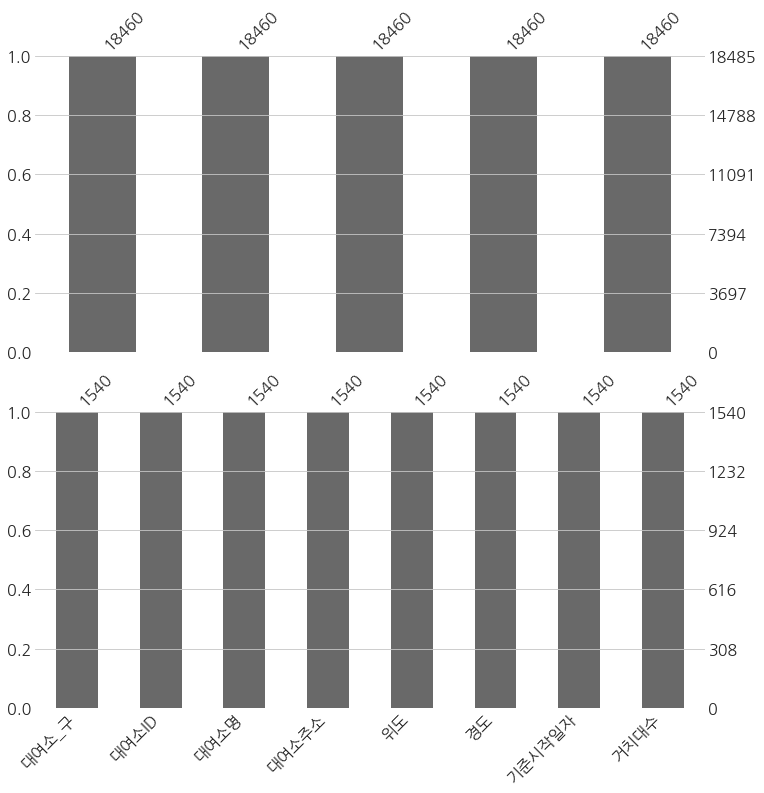

In [23]:
import missingno as msno
f, ax = plt.subplots(2, 1, figsize=(12, 12))
msno.bar(df_bike, ax=ax[0])
msno.bar(df_station, ax=ax[1])

* bike데이터에는 25개의 null값이 있다.
* station데이터에는 null값이 없다.

In [24]:
pd.set_option('display.max_rows', 30)
df_bike[df_bike['district'].isnull()]

,district,station,date,rent,return
10799,NaN,NaN,NaN,NaN,NaN
10800,NaN,NaN,NaN,NaN,NaN
10801,NaN,NaN,NaN,NaN,NaN
10802,NaN,NaN,NaN,NaN,NaN
10803,NaN,NaN,NaN,NaN,NaN
12332,NaN,NaN,NaN,NaN,NaN
12333,NaN,NaN,NaN,NaN,NaN
12334,NaN,NaN,NaN,NaN,NaN
12335,NaN,NaN,NaN,NaN,NaN
12336,NaN,NaN,NaN,NaN,NaN


* 모든 컬럼이 null값인 레코드들이다. 삭제해주자

In [25]:
df_bike.dropna(inplace=True)

In [26]:
print(df_bike.shape)
df_bike.tail()

(18460, 5)


,district,station,date,rent,return
18480,중랑구,1455. 상봉역 2번 출구,201905.0,1362.0,1300.0
18481,중랑구,1456. 상아빌딩(우림시장 교차로),201905.0,826.0,867.0
18482,중랑구,1457. 동원사거리,201905.0,827.0,749.0
18483,중랑구,1458. 상봉터미널2,201905.0,1421.0,1492.0
18484,중랑구,1459. 용마한신아파트사거리,201905.0,447.0,320.0


* index를 초기화해주자.

In [27]:
df_bike.reset_index(drop=True, inplace=True)
df_bike.tail(3)

,district,station,date,rent,return
18457,중랑구,1457. 동원사거리,201905.0,827.0,749.0
18458,중랑구,1458. 상봉터미널2,201905.0,1421.0,1492.0
18459,중랑구,1459. 용마한신아파트사거리,201905.0,447.0,320.0


In [28]:
df_station.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


In [29]:
# 컬럼명 영어로 변경!
df_station.columns = ['district', 'id', 'station',
                      'address', 'lat', 'lng', 'date', 'count']
df_station.head(3)

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14


### 2-3. station컬럼 처리, id컬럼 추가

In [30]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18460 entries, 0 to 18459
Data columns (total 5 columns):
district    18460 non-null object
station     18460 non-null object
date        18460 non-null float64
rent        18460 non-null float64
return      18460 non-null float64
dtypes: float64(3), object(2)
memory usage: 721.2+ KB


In [31]:
df_bike.head(3)

,district,station,date,rent,return
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0,4072.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0,2382.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0,1402.0


* 대여소 이름을 보면, [id. 대여소명]으로 되어있다.
* 이것을 [id], [대여소명]으로 변경하면, 나중에 station 데이터의 id컬럼과 연결 시 편리할 것으로 보인다

In [32]:
import re
from tqdm import tqdm_notebook

p1 = re.compile('\d+')
p2 = re.compile('\d+[. ]')
error_row = []

for row in tqdm_notebook(df_bike.index):
    try:
        m = p1.match(df_bike.loc[row, 'station'])
        df_bike.loc[row, 'id'] = m.group()
    except:
        df_bike.loc[row, 'id'] = 'None'
        error_row.append(row)    # 에러행 저장해놓기
    try:
        df_bike.loc[row, 'station'] = p2.sub('', df_bike.loc[row, 'station'])
    except:
        error_row.append(row)    # 에러행 저장해놓기

In [33]:
df_bike.head()

,district,station,date,rent,return,id
0,강남구,현대고등학교 건너편,201906.0,3909.0,4072.0,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0,2382.0,2302
2,강남구,논현역 7번출구,201906.0,1567.0,1402.0,2303
3,강남구,신영 ROYAL PALACE 앞,201906.0,559.0,207.0,2304
4,강남구,MCM 본사 직영점 앞,201906.0,730.0,905.0,2305


In [34]:
print('에러행 수: {}개'.format(len(error_row)))
print('\n에러행의 대여소명: \n{}'.format(df_bike.loc[error_row,:].station.value_counts()))
df_bike.loc[error_row,:]

에러행 수: 25개

에러행의 대여소명: 
대여소명 없음     11
중랑센터         6
상암센터 정비실     6
시스템관리팀       2
Name: station, dtype: int64


,district,station,date,rent,return,id
1381,정비센터,상암센터 정비실,201906.0,2.0,9.0,None
1382,정비센터,중랑센터,201906.0,36.0,24.0,None
1543,그룹명 없음,대여소명 없음,201907.0,0.0,1.0,None
1544,그룹명 없음,대여소명 없음,201907.0,0.0,12537.0,None
1545,그룹명 없음,대여소명 없음,201907.0,0.0,1.0,None
1546,그룹명 없음,대여소명 없음,201907.0,0.0,12537.0,None
2928,정비센터,상암센터 정비실,201907.0,1.0,11.0,None
2929,정비센터,중랑센터,201907.0,42.0,34.0,None
3090,그룹명 없음,대여소명 없음,201908.0,0.0,12188.0,None
4468,정비센터,상암센터 정비실,201908.0,4.0,13.0,None


* 정비센터이거나, 그룹명이 없는 경우가 있다. 
    * 근데센터에서 분출된 자전거는 정말 정비가 되어서 나온 것은 아닐까?
* 정비센터는 count 수 자체가 적고, 대여소명이 없는 곳은 추적할 방법이 없기때문에, **삭제하도록 하자.**
    * 대여소명이 없는 곳은 대여소가 사라진곳이려나?

In [35]:
df_bike.drop(error_row, inplace=True)
df_bike.reset_index(drop=True, inplace=True)

In [36]:
df_bike.drop(df_bike[df_bike.district=='정비센터'].index, axis=0, inplace=True)

In [37]:
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


* 이제 station데이터에 있는 station컬럼 내 id를 빼주자.

In [38]:
p = re.compile('\d+[. ]')
for row in df_station.index:
    try:
        df_station.loc[row, 'station'] = p2.sub('', df_station.loc[row, 'station'])
    except:
        print(row)

In [39]:
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


### 2-4. 컬럼 형식 변경

#### 2-4-1. df_bike

In [40]:
df_bike.head()

,district,station,date,rent,return,id
0,강남구,현대고등학교 건너편,201906.0,3909.0,4072.0,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0,2382.0,2302
2,강남구,논현역 7번출구,201906.0,1567.0,1402.0,2303
3,강남구,신영 ROYAL PALACE 앞,201906.0,559.0,207.0,2304
4,강남구,MCM 본사 직영점 앞,201906.0,730.0,905.0,2305


In [41]:
df_bike.columns = ['district', 'station', 'date', 'rent', 'return', 'id']
df_bike.head()

,district,station,date,rent,return,id
0,강남구,현대고등학교 건너편,201906.0,3909.0,4072.0,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0,2382.0,2302
2,강남구,논현역 7번출구,201906.0,1567.0,1402.0,2303
3,강남구,신영 ROYAL PALACE 앞,201906.0,559.0,207.0,2304
4,강남구,MCM 본사 직영점 앞,201906.0,730.0,905.0,2305


In [42]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18408 entries, 0 to 18434
Data columns (total 6 columns):
district    18408 non-null object
station     18408 non-null object
date        18408 non-null float64
rent        18408 non-null float64
return      18408 non-null float64
id          18408 non-null object
dtypes: float64(3), object(3)
memory usage: 1006.7+ KB


* date
    * datetime형식으로 변경
* count, id
    * int로 변경

In [43]:
df_bike['date'] = df_bike['date'] * 100 + 1    # date 내 월까지만 기재되있으므로 이를 모두 1일로 통일
df_bike['date'] = pd.to_datetime(df_bike['date'], format='%Y%m%d')
df_bike['return'] = df_bike['return'].astype('int')
df_bike['rent'] = df_bike['rent'].astype('int')
df_bike['id'] = df_bike['id'].astype('int')

In [44]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18408 entries, 0 to 18434
Data columns (total 6 columns):
district    18408 non-null object
station     18408 non-null object
date        18408 non-null datetime64[ns]
rent        18408 non-null int32
return      18408 non-null int32
id          18408 non-null int32
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 791.0+ KB


In [45]:
df_bike.head(3)

,district,station,date,rent,return,id
0,강남구,현대고등학교 건너편,2019-06-01,3909,4072,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432,2382,2302
2,강남구,논현역 7번출구,2019-06-01,1567,1402,2303


#### 2-4-2. df_station

In [46]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1539
Data columns (total 8 columns):
district    1540 non-null object
id          1540 non-null float64
station     1540 non-null object
address     1540 non-null object
lat         1540 non-null float64
lng         1540 non-null float64
date        1540 non-null object
count       1540 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 148.3+ KB


* id
    * int로 변환
* date
    * datetime으로 변환

In [47]:
df_station['id'] = df_station['id'].astype('int')
df_station['date'] = pd.to_datetime(df_station['date'])
df_station

ValueError: ('Unknown string format:', '2018.7.4개통')

* 오류가 나서 살펴보니, date컬럼에 문자가 섞여있는 데이터가 있나보다.

In [48]:
# 개통이라는 단어가 포함되어있으면, 그 단어를 제외하여 저장
for row in df_station.index:
    try:
        if df_station.loc[row, 'date'][-2:] == '개통': 
            df_station.loc[row, 'date'] = df_station.loc[row, 'date'][:-2]
    except:
        pass

In [49]:
df_station['date'] = pd.to_datetime(df_station['date'])
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


In [50]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1539
Data columns (total 8 columns):
district    1540 non-null object
id          1540 non-null int32
station     1540 non-null object
address     1540 non-null object
lat         1540 non-null float64
lng         1540 non-null float64
date        1540 non-null datetime64[ns]
count       1540 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 142.3+ KB


* 잘 처리가 되었다.

#### 2-4-3. 컬럼 순서 변경

In [51]:
df_bike.head(3)

,district,station,date,rent,return,id
0,강남구,현대고등학교 건너편,2019-06-01,3909,4072,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432,2382,2302
2,강남구,논현역 7번출구,2019-06-01,1567,1402,2303


In [52]:
df_bike = df_bike[['district', 'id', 'station', 'date', 'rent', 'return']]
df_bike.head(3)

,district,id,station,date,rent,return
0,강남구,2301,현대고등학교 건너편,2019-06-01,3909,4072
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432,2382
2,강남구,2303,논현역 7번출구,2019-06-01,1567,1402


## 3. 데이터 분석
* 어느 지역에 자전거가 많이 배치되어있는지부터 확인해보자.

### 3-1. 따릉이가 많이 배치된 지역 찾기
* 어느 지역에 따릉이가 많을까?
* 서울 중심부에 비교적 많이 배치되어있지 않을까? (정말 서울스러운 생각..)

#### 3-1-1. 가장 따릉이가 많이 배치된 대여소는?
* 먼저, 자전거 배치 수를 살펴보자.

40      5
39      1
35      3
30     12
27      1
26      2
25      8
23      1
22      1
21      3
20    199
19      6
18      6
17      5
16      9
15    283
14     14
13     28
12     47
11     11
10    714
9      37
8      87
7      37
6       5
5      15
Name: count, dtype: int64


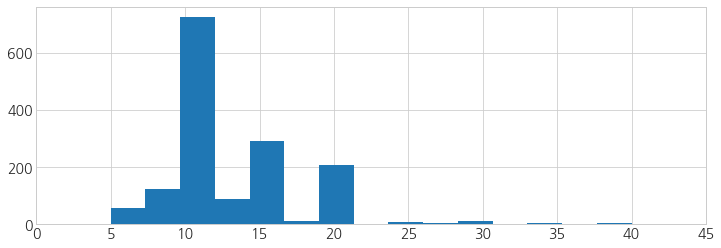

In [53]:
print(df_station['count'].value_counts().sort_index(ascending=False))
plt.figure(figsize=(12, 4))
plt.hist(df_station['count'], bins=15)
plt.xlim(0, 45)
plt.show()

* 가장 많이 배치된 곳은 무려 40대나 배치되어있다.
    * 40대면 도로 전체에 자전거가 깔려있는건가... 아직 본 적이 없어서 궁금하다.
    * 아마 한강 근처나 자전거도로가 잘 되어있는 곳이 아닐까?
* 10대가 배치된 곳이 가장 많고, 다음으로는 15대, 20대가 많다.
* 가장 적은곳은 5대가 배치되어있다.
* **35대 이상 배치된 곳은 어디인지 살펴보자.**

In [54]:
mt35_station = df_station[df_station['count']>=35].sort_values('count', ascending=False).reset_index(drop=True)
mt35_station

,district,id,station,address,lat,lng,date,count
0,마포구,186,월드컵공원,서울특별시 마포구 하늘공원로 108-1,37.563965,126.898209,2016-07-06 12:00:00,40
1,영등포구,207,여의나루역 1번출구 앞,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098,2015-09-17 15:33:18,40
2,마포구,420,서울시 공공자전거 상암센터,서울특별시 마포구 월드컵북로47길 10,37.566246,126.896179,2015-10-07 11:39:12,40
3,광진구,574,아차산역4번출구,서울특별시 광진구 능동로 216,37.551849,127.088982,2016-07-06 12:00:00,40
4,용산구,829,베르가모앞,서울특별시 용산구 한강대로 23,37.522930,126.961693,2017-11-28 11:57:57,40
5,광진구,3507,어린이회관,서울특별시 광진구 능동 465-7,37.545952,127.078003,2017-11-01 16:00:00,39
6,영등포구,206,KBS 앞,서울특별시 영등포구 여의공원로 13,37.524666,126.918022,2015-09-17 15:09:17,35
7,영등포구,212,여의도역 1번출구 옆,서울특별시 영등포구 의사당대로 88,37.521362,126.923462,2015-09-17 15:12:54,35
8,중구,311,서울광장 옆,서울특별시 중구 세종대로 지하 101,37.566612,126.977470,2015-10-07 12:11:56,35


* 마포구, 영등포구, 광진구 등 한강 근처이거나 자전거도로가 있는 지역이 많다.
* 근데 이렇게 텍스트로만 보니, 어디에 있는지 감이 잘 오지는 않는다.
* 지도에 나타내서 살펴보자.

In [55]:
import folium

map = folium.Map([mt35_station.lat.median(), mt35_station.lng.median()], zoom_start=13)
for row in mt35_station.index:
    folium.Marker([mt35_station.loc[row, 'lat'], mt35_station.loc[row, 'lng']]).add_to(map)
map

* 예상대로, 따릉이가 많이 배치된 지역은 대부분 한강 근처에 분포되어있는 것을 알 수 있다.
* 다음으로는, **어느 구에** 따릉이가 많이 배치되어있는지 살펴보자.

In [56]:
district_count = df_station.groupby('district').sum()
district_count.head()

,id,lat,lng,count
district,,,,
강남구,233051,3712.498423,12578.440221,1218
강동구,61258,2140.213577,7247.300705,763
강북구,59525,1467.706114,4953.973380,451
강서구,101004,3192.395109,10781.119844,1002
관악구,109301,1911.471931,6473.794822,640


In [58]:
import json
geo_data = json.load(open('source/Seoul_district_geo.json', encoding='utf-8'))

In [59]:
map = folium.Map([df_station['lat'].median(),
                  df_station['lng'].median()], zoom_start=11)

map.choropleth(geo_data=geo_data,
               data=district_count['count'],
               columns=[district_count.index, district_count['count']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [60]:
df_station

,district,id,station,address,lat,lng,date,count
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5
...,...,...,...,...,...,...,...,...
1535,종로구,464,삼청동 골목,종로구 팔판길 46,37.584190,126.981697,2019-08-16 00:00:00,10
1536,관악구,2185,대학동 고시촌,서울특별시 관악구 신림로 97 밀라트,37.470467,126.938652,2019-09-26 00:00:00,10
1537,서초구,2265,이수고가차도 남단,서울특별시 서초구 동작대로 204 청남빌딩,37.494743,126.983063,2017-08-09 11:16:28,10
1538,종로구,465,삼청공원 앞,서울특별시 종로구 삼청동 25-32,37.587605,126.983597,2019-11-20 00:00:00,5


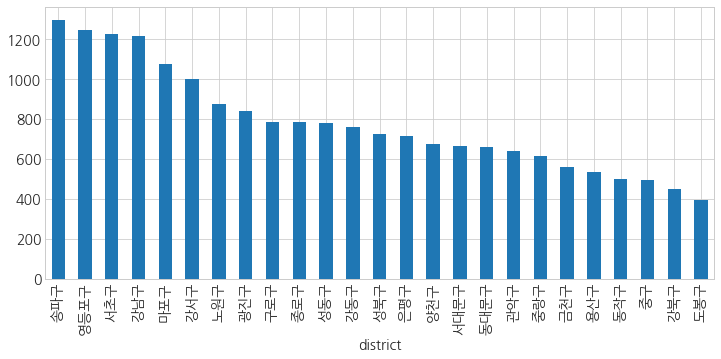

In [61]:
df_station.groupby('district').sum()['count'].sort_values(ascending=False).plot('bar', figsize=(12, 5))

* **강남 3구(강남구, 서초구, 송파구)와 영등포구가 가장 따릉이가 많이 배치되어있다.**
* 반면 **강북은 전반적으로 따릉이 수가 적은 것을 확인할 수 있다.**
    * 그나마 제일 많은 곳은 마포구다.
* 놀랐던 것은, 내가 살고있는 **성동구도 상대적으로 따릉이가 많은 편은 아니었다!**
    * 서울숲 근처에 따릉이가 많아서 가시적으로는 굉장히 많아보였는데, 아마 서울숲 근처에만 많나보다.
    * 음.. 이렇게 끝내면 카더라니까, 실제로 **성동구에는 서울숲 근처에만 따릉이가 많은지 확인해보자!**

#### 3-1-2. 성동구 내 따릉이 분포 확인해보기
* 정말 서울숲에만 많아서 많아보인건가?
* 나는 정녕 우물 안 개구리 혹은 서울숲 안 사슴이었던것인가

In [62]:
seongdong = df_station[df_station['district']=='성동구']
seongdong.reset_index(drop=True, inplace=True)
seongdong.head()

,district,id,station,address,lat,lng,date,count
0,성동구,506,금호 어울림 아파트 앞,서울특별시 성동구 광나루로 249,37.549061,127.057793,2015-10-07 11:50:10,7
1,성동구,507,성수아이에스비즈타워 앞,서울특별시 성동구 성수이로 147,37.548203,127.057114,2015-10-07 11:50:53,7
2,성동구,508,성수아카데미타워 앞,서울특별시 성동구 성수이로 118,37.545166,127.057510,2015-10-07 11:51:33,10
3,성동구,509,이마트 버스정류소 옆,서울특별시 성동구 뚝섬로 379,37.539654,127.052589,2015-10-07 11:52:07,20
4,성동구,510,서울숲 남문 버스정류소 옆,서울특별시 성동구 왕십리로11길 9,37.541222,127.043800,2015-10-07 11:55:30,10


In [63]:
seongdong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
district    63 non-null object
id          63 non-null int32
station     63 non-null object
address     63 non-null object
lat         63 non-null float64
lng         63 non-null float64
date        63 non-null datetime64[ns]
count       63 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 3.8+ KB


In [64]:
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# 성동구 맵 만들기
map = folium.Map([seongdong['lat'].median(),
                  seongdong['lng'].median()],
                 tiles='Stamen Watercolor', zoom_start=14)

# 클러스터링 생성
MarkerCluster(seongdong[['lat', 'lng']]).add_to(map)
# 히트맵 생성
HeatMap(seongdong[['lat', 'lng', 'count']]).add_to(map)

# 자전거 수가 많은 지역 10군데 표시
for row in seongdong.sort_values('count', ascending=False).index[:10]:
    lat = seongdong.loc[row, 'lat']
    lng = seongdong.loc[row, 'lng']
    folium.Marker([lat, lng], icon=folium.Icon(color='black',icon="bicycle", prefix='fa')).add_to(map)

# 서울숲 근처 녹색 원 표시
folium.CircleMarker([37.544796, 127.039266], radius=90,
                    color='#008024', fill_color='#06EB51', fill_opacity=.2).add_to(map)
map

> *히트맵: 어느 곳에 자전거수가 많은지 확인 가능  
클러스터링(지도 내 숫자): 구역 당 대여소의 수를 확인 가능*

* 서울숲 근처에는 성동구에서 가장 많은 자전거 대여소 중 하나가 있다.
* 그리고 근처에 다섯개의 대여소가 있다. 적다고 할 수는 없다.
* **하지만!**
    * 서울숲 근처에만 집중적으로 몰려있는 것은 아니다.
    * 전반적으로 고르게 퍼져있음을 확인할 수 있다.

### 3-2. 따릉이를 많이 대여,반납하는 지역 찾기

* 앞에서는  
    1) 대여소가 어느 구에 많은지 알았고,  
    2) 서울숲 근처에 대여소가 몰려있는지 확인해보았다.  
* 이제 대여, 반납 수를 분석하여 **실제로 어느 구역에 따릉이가 부족한 지 분석해보자.**

In [65]:
df_bike.head()

,district,id,station,date,rent,return
0,강남구,2301,현대고등학교 건너편,2019-06-01,3909,4072
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432,2382
2,강남구,2303,논현역 7번출구,2019-06-01,1567,1402
3,강남구,2304,신영 ROYAL PALACE 앞,2019-06-01,559,207
4,강남구,2305,MCM 본사 직영점 앞,2019-06-01,730,905


* 각 대여소마다 날짜별로 구분되어있으므로, id를 기준으로 합쳐주자.
* 지금은 시계열로는 크게 얻을 수 있는 정보가 없으므로 date는 삭제!

In [66]:
df_bike.groupby('id').sum().merge(df_bike[['district', 'station', 'id']], on='id')

,id,rent,return,district,station
0,101,8552,8842,마포구,(구)합정동 주민센터
1,101,8552,8842,마포구,(구)합정동 주민센터
2,101,8552,8842,마포구,(구)합정동 주민센터
3,101,8552,8842,마포구,(구)합정동 주민센터
4,101,8552,8842,마포구,(구)합정동 주민센터
...,...,...,...,...,...
18403,3542,15793,15533,광진구,래미안 구의파크 스위트
18404,3542,15793,15533,광진구,래미안 구의파크 스위트
18405,3542,15793,15533,광진구,래미안 구의파크 스위트
18406,9996,4,4,성동구,시설2


In [67]:
df_group = pd.merge(df_bike.groupby('id').sum(), df_bike[[
                    'id', 'district', 'station']].drop_duplicates(), on='id', how='left')
df_group = df_group[['id', 'district', 'station', 'rent', 'return']]

df_group.head()

,id,district,station,rent,return
0,101,마포구,(구)합정동 주민센터,8552,8842
1,102,마포구,망원역 1번출구 앞,34333,32134
2,103,마포구,망원역 2번출구 앞,23096,22441
3,104,마포구,합정역 1번출구 앞,20665,18804
4,105,마포구,합정역 5번출구 앞,11085,9874


In [68]:
print(df_group.shape)
dup_index = df_group[df_group['id'].duplicated()].index
df_group.drop(dup_index, axis=0, inplace=True)


(1566, 5)


#### 3-2-1. 따릉이를 많이 대여하는 구역은?
* 먼저, 많이 대여하는 구역은 어디인지 살펴보자.

In [69]:
# 구역으로 groupby
sum_district = df_group.groupby('district').sum()[['rent', 'return']]
sum_district

,rent,return
district,,
강남구,790737,732815
강동구,652896,671662
강북구,327191,328382
강서구,1128785,1146665
관악구,667287,666599
광진구,1169242,1161111
구로구,664399,662321
금천구,285370,281703
노원구,915608,915941


In [70]:
sum_district.sort_values('rent', ascending=False).head()

,rent,return
district,,
송파구,1550841,1555244
영등포구,1521902,1504839
마포구,1323691,1328013
광진구,1169242,1161111
강서구,1128785,1146665


In [71]:
sum_district.sort_values('rent', ascending=False).tail()

,rent,return
district,,
중구,444378,417963
용산구,381281,381442
강북구,327191,328382
도봉구,306459,315583
금천구,285370,281703


* 역시 강남 3구 + 영등포구가 제일 많이 대여가 되고있다. 
* 금천구가 가장 대여가 적고, 의외로 용산구, 중구도 가장 대여가 적다.
* 이번에는 반납수를 볼텐데, **대여와 반납의 상관관계를 파악해보자.**
    * 예상하건데, 대여가 많은 구가 당연히 반납도 많지 않을까?

#### 3-2-2. 대여가 많으면 반납도 많을까?
* 어쩌면 결과가 뻔한 질문이지만, 대여가 많으면 반납도 많을지 눈으로 확인해보고싶다.

Text(0.5, 1.0, 'r=1.00')

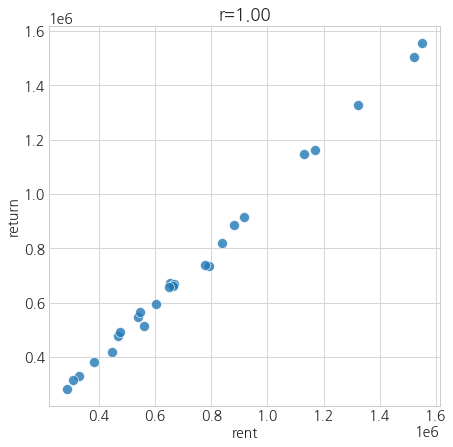

In [72]:
plt.figure(figsize=(7, 7))
sns.scatterplot('rent', 'return', s=100, alpha=.8, data=sum_district.sort_index())
plt.title('r={:.2f}'.format(sum_district['rent'].corr(sum_district['return'])))

* 예상대로, 대여와 반납은 선형관계에 있다.
* 그럼 구역 말고 대여소별로는 어떤지 살펴보자.

Text(0.5, 1.0, 'r=0.99')

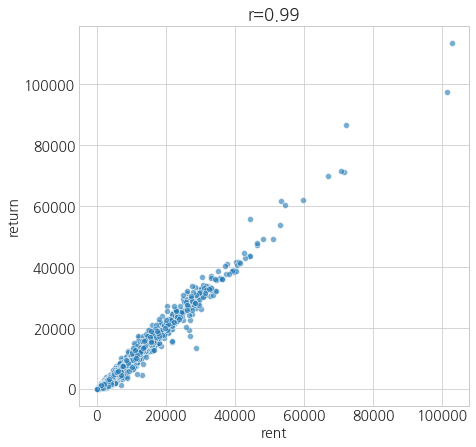

In [73]:
plt.figure(figsize=(7, 7))
sns.scatterplot('rent', 'return', data=df_group, alpha=.6)
plt.title('r={:.2f}'.format(df_group['rent'].corr(df_group['return'])))

* 대여소별로도 크게 다르지 않게, 선형관계에 있다.
* 하지만, 구별로 보았을 때보다는 선형에서 조금 벗어나는 값들이 몇개 보인다.
* 대여수 / 반납수 를 계산하여 **대여보다 반납이,** 혹은 **반납보다 대여가 많은 대여소**를 찾아보자.

#### 3-2-3. 반납 대비 대여가 높은 대여소는?
* 반납보다 대여가 많다면 따릉이 충원 지역 후보라고 볼 수 있을것이다.

In [74]:
df_group['rent_return_ratio'] = df_group['rent'] / df_group['return']
df_group.head()

,id,district,station,rent,return,rent_return_ratio
0,101,마포구,(구)합정동 주민센터,8552,8842,0.967202
1,102,마포구,망원역 1번출구 앞,34333,32134,1.068432
2,103,마포구,망원역 2번출구 앞,23096,22441,1.029188
3,104,마포구,합정역 1번출구 앞,20665,18804,1.098968
4,105,마포구,합정역 5번출구 앞,11085,9874,1.122645


In [75]:
df_group.sort_values('rent_return_ratio', ascending=False, inplace=True)
df_group.reset_index(drop=True, inplace=True)
df_group.tail()

,id,district,station,rent,return,rent_return_ratio
1551,1004,강동구,삼성광나루아파트 버스정류장,12288,16917,0.726370
1552,1146,강서구,곰달래사거리,8969,12373,0.724885
1553,2060,동작구,남성역3번출구 뒤,10945,15193,0.720398
1554,1444,중랑구,면목4치안센터,7161,10340,0.692553
1555,1141,강서구,곰달래 문화복지센터 1-1,11938,17377,0.687000


* rent_return_ratio이라는 지표를 통해, 반납 대비 대여가 얼마나 많은지 알 수 있다. 
* 가장 비율이 높은 신당 래미안 앞은, 반납 대비 대여가 5.5배나 높다.
* 반면, 가장 낮은 비율을 가진 곳은 강서구의 곰달래 문화복지센터이다.
    * 4번째로 낮은 곳인 곰달래사거리도 0.72로 대여보다 반납이 많다.
    * 곰달래라고 하는 곳의 근처에서 사람들이 따릉이 반납을 많이 하나보다.
- - - -
* **반납보다 대여를 2배 이상 많은 곳**이 있다면, 수요-공급이 안 맞는 것 아닐까?
* 계수가 2 이상인 곳을 찾아보자.

In [76]:
df_twotimes = df_group[df_group.rent_return_ratio >= 2]
df_twotimes

,id,district,station,rent,return,rent_return_ratio
0,434,중구,신당 래미안 버스정류장,2616,471,5.554140
1,167,서대문구,연가초등학교 옆,7075,1396,5.068052
2,2286,서초구,탑성마을입구,821,168,4.886905
3,3527,성동구,왕십리 자이아파트,1194,258,4.627907
4,1304,성북구,만해공원,3310,754,4.389920
...,...,...,...,...,...,...
45,1545,강북구,솔샘역 2번 출구,3980,1935,2.056848
46,159,서대문구,이대역 4번 출구,6626,3248,2.040025
47,139,서대문구,연세대 정문 건너편,7836,3849,2.035853
48,572,광진구,국립정신 건강센터 앞,5500,2721,2.021316


* 의도한 것은 아닌데, 정확하게 50개의 대여소가 2보다 높다.
* 어느 구가 가장 많은지 살펴보자.

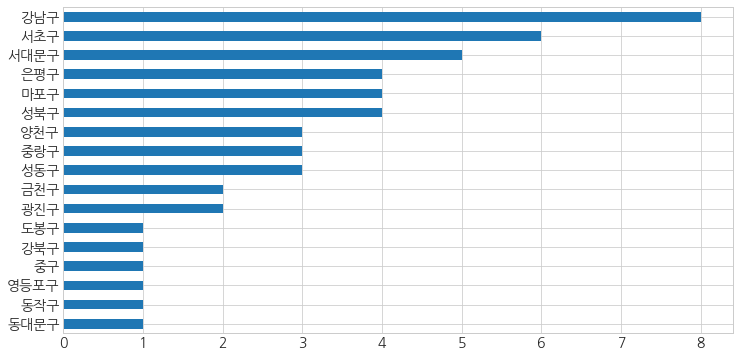

In [77]:
df_twotimes['district'].value_counts().sort_values().plot('barh', figsize=(12, 6))

* 강남구가 가장 많음을 확인할 수 있다.
* 이제 이 대여소들이 어디있는지 시각화해서 더 자세히 분석해보자.

#### 3-2-3. 대여가 많은 지역 시각화하기
* 먼저, 대여소의 위치정보를 join하자.

In [78]:
df_group.head()

,id,district,station,rent,return,rent_return_ratio
0,434,중구,신당 래미안 버스정류장,2616,471,5.554140
1,167,서대문구,연가초등학교 옆,7075,1396,5.068052
2,2286,서초구,탑성마을입구,821,168,4.886905
3,3527,성동구,왕십리 자이아파트,1194,258,4.627907
4,1304,성북구,만해공원,3310,754,4.389920


* 각 대여소의 좌표정보와 대여소 수를 얻기 위해 station과 bike데이터를 join해주자

##### 3-2-3-1. df_bike + df_station

In [79]:
df_bike = df_group.merge(df_station[['id', 'lat', 'lng', 'count']], how='left', on='id')
df_bike.head()

,id,district,station,rent,return,rent_return_ratio,lat,lng,count
0,434,중구,신당 래미안 버스정류장,2616,471,5.554140,37.561489,127.023933,10.0
1,167,서대문구,연가초등학교 옆,7075,1396,5.068052,37.579460,126.917130,15.0
2,2286,서초구,탑성마을입구,821,168,4.886905,37.458549,127.055885,10.0
3,3527,성동구,왕십리 자이아파트,1194,258,4.627907,37.561790,127.024391,8.0
4,1304,성북구,만해공원,3310,754,4.389920,37.594402,126.992310,15.0


In [80]:
df_bike[df_bike['lat'].isnull()].head()

,id,district,station,rent,return,rent_return_ratio,lat,lng,count
12,1317,성북구,정릉동 교통광장,130,42,3.095238,NaN,NaN,NaN
44,2386,강남구,sk 동우주유소 앞,189,91,2.076923,NaN,NaN,NaN
60,174,서대문구,명지대학교 학생회관,162,91,1.780220,NaN,NaN,NaN
141,172,서대문구,서대문소방서,2303,1681,1.370018,NaN,NaN,NaN
203,1687,마포구,서울월드컵경기장 테스트,20,16,1.250000,NaN,NaN,NaN


In [81]:
error_station = df_bike[df_bike['lat'].isnull()]['station'].unique()
error_station

array([' 정릉동 교통광장', ' sk 동우주유소 앞', ' 명지대학교 학생회관', ' 서대문소방서',
       ' 서울월드컵경기장 테스트', ' 더샵스타시티 C동 앞', ' 창동역공영주차장앞', ' 창천문화공원',
       ' 삼청동 주민센터', ' 난곡 사거리', ' 시설2', ' 서울역 5번출구 앞', ' 서울남부초등학교 옆',
       ' 정릉교회 앞', ' 남성역 2번출구 뒷편', ' 창동한신', ' 강일동 에너지 마루'], dtype=object)

* join을 했는데, 정보가 없는 대여소가 발견되었다.
* 따릉이 사이트에서도 id가 조회되지 않는다.
    * 대여소가 폐지된 것으로 예상된다.
* 일단 station명으로 좌표를 검색하여 채워넣고, count값은 통계량으로 채워넣자.

In [82]:
# 구글에서 찾아서 직접 수치 입력하기
# googlemaps 라이브러리를 활용할 수도 있지만, 주소명이 정확하게 나와있지 않기 때문에 수기로 보정

row = df_bike[df_bike['station'] == error_station[0]].index
df_bike.loc[row, 'lat'] = 37.608491 
df_bike.loc[row, 'lng'] = 127.006892

row = df_bike[df_bike['station'] == error_station[1]].index
df_bike.loc[row, 'lat'] = 37.509497
df_bike.loc[row, 'lng'] = 127.040466

row = df_bike[df_bike['station'] == error_station[2]].index
df_bike.loc[row, 'lat'] = 37.580213
df_bike.loc[row, 'lng'] = 126.923509

row = df_bike[df_bike['station'] == error_station[3]].index
df_bike.loc[row, 'lat'] = 37.5731167
df_bike.loc[row, 'lng'] = 126.9340639

row = df_bike[df_bike['station'] == error_station[4]].index
df_bike.loc[row, 'lat'] = 37.5682588
df_bike.loc[row, 'lng'] = 126.8950887

row = df_bike[df_bike['station'] == error_station[5]].index
df_bike.loc[row, 'lat'] = 37.5380488
df_bike.loc[row, 'lng'] = 127.0705414

row = df_bike[df_bike['station'] == error_station[6]].index
df_bike.loc[row, 'lat'] = 37.6544976
df_bike.loc[row, 'lng'] = 127.0474658

row = df_bike[df_bike['station'] == error_station[7]].index
df_bike.loc[row, 'lat'] = 37.5567852
df_bike.loc[row, 'lng'] = 126.933313

row = df_bike[df_bike['station'] == error_station[8]].index
df_bike.loc[row, 'lat'] = 37.5845386
df_bike.loc[row, 'lng'] = 126.979615

row = df_bike[df_bike['station'] == error_station[9]].index
df_bike.loc[row, 'lat'] = 37.481794
df_bike.loc[row, 'lng'] = 126.9123172

row = df_bike[df_bike['station'] == error_station[10]].index
df_bike.drop(row, axis=0, inplace=True)

row = df_bike[df_bike['station'] == error_station[11]].index
df_bike.loc[row, 'lat'] = 37.4817888
df_bike.loc[row, 'lng'] = 126.8794864

row = df_bike[df_bike['station'] == error_station[12]].index
df_bike.loc[row, 'lat'] = 37.4848216
df_bike.loc[row, 'lng'] = 126.9199275

row = df_bike[df_bike['station'] == error_station[13]].index
df_bike.loc[row, 'lat'] = 37.6053723
df_bike.loc[row, 'lng'] = 127.0106539

row = df_bike[df_bike['station'] == error_station[14]].index
df_bike.loc[row, 'lat'] = 37.4902357
df_bike.loc[row, 'lng'] = 126.9652447

row = df_bike[df_bike['station'] == error_station[15]].index
df_bike.loc[row, 'lat'] = 37.638916
df_bike.loc[row, 'lng'] = 127.0388004

row = df_bike[df_bike['station'] == error_station[16]].index
df_bike.loc[row, 'lat'] = 37.563288
df_bike.loc[row, 'lng'] = 127.174808

* 좌표를 모두 채웠다.
    * 사실 이런 노가다를 재미있어하는 편이다. 많이 해봤어서..
    * 더 좋은 방법이 분명 있겠지만...
    * 고민할 시간에 직접 채우자!
* 이제는 count를 채워줄 시간.
    * 내 아이디어는 **구별 평균값을 채워주는 것이다.**

In [83]:
error_district = df_bike[df_bike['count'].isnull()]['district'].unique()
error_district

array(['성북구', '강남구', '서대문구', '마포구', '광진구', '도봉구', '종로구', '관악구', '중구',
       '동작구', '강동구'], dtype=object)

In [84]:
# count값이 없는 대여소의 count값을 해당 구의 평균값으로 대체
for dis in error_district:
    mean_tmp = int(df_bike[df_bike.district==dis]['count'].mean())
    df_bike.loc[df_bike.district==dis, 'count'] = mean_tmp

In [85]:
df_bike[df_bike['count'].isnull()].sum()

id                   0.0
district             0.0
station              0.0
rent                 0.0
return               0.0
rent_return_ratio    0.0
lat                  0.0
lng                  0.0
count                0.0
dtype: float64

* 완료!

##### 3-2-3-2. 시각화

In [123]:
# 서울 지도 그리기
map = folium.Map([df_bike.lat.median(), df_bike.lng.median()], zoom_start=12)

# 구별 대여량을 색으로 표현
map.choropleth(geo_data=geo_data,
               data=df_bike.groupby('district').sum()['rent'],
               columns=[df_bike.groupby('district').sum().index, df_bike.groupby('district').sum()['rent']],
               fill_color='YlGnBu',  # PuRd, YlGnBu
               key_on='feature.id')

# 반납 대비 대여가 2.0 이상인 대여소 저장
df_twotimes = df_bike[df_bike.rent_return_ratio >= 2]

# 위에서 저장한 대여소를 클러스터로 표현
MarkerCluster(df_twotimes[['lat', 'lng']]).add_to(map)

# 가장 반납 대비 대여가 높은 대여소 10개는 자전거 모양으로 따로 마커 표시
for row in df_twotimes[:10].index:
    lat = df_twotimes.lat[row]
    lng = df_twotimes.lng[row]
    folium.Marker([lat, lng], icon=folium.Icon(color='black',icon="bicycle", prefix='fa')).add_to(map)
map

* **어느 구역에 따릉이를 확충해야할까?**
    * 내가 담당자라면, **검은색 자전거 마크가 있는 곳을 우선적으로 검토**할 것이다.
        * 검은색 마크가 있는 곳은 반납 대비 대여가 가장 높은 10곳이다.
    * 다음으로는, **대여가 많은 구 중 반납 대비 대여가 높은 곳들**을 후보에 넣을 것 같다.
* 추가로, 특이점이 보인 곳들을 아래에 정리해보았다.
- - - -
* 반납 대비 대여가 많은 대여소는 **강남구에 가장 많이 밀집되어**있다.
    * 특히, **회사가 밀집된 강남구청-학동사거리 부근**에 몰려있다.
    * **출퇴근 시에 이용자가 몰려서 나타난 현상**이 아닐까 추측된다.
    * 해당 지역에 따릉이 대여소를 추가로 설치하면, 출퇴근 따릉이 전쟁이 줄어들지 않을까 싶다.
        * 어쩌면 이런 현상때문에 킥고잉과 같은 전동킥보드 공유 서비스가 강남구를 일대로 서비스를 시작했을 가능성이 있다.
* **서초구에는 가장 따릉이 부족이 심한 대여소 10곳 중 4곳이 존재**한다.
    * 특히 남부순환로에 이어져있는 두 곳의 대여소는 **모두 아파트 앞이라는 공통점**이 있다.
    * **주거민들이 이용하는 비율이 높을 것**으로 예상된다.
        * 추측이지만, 래미안에 살면서 강남에 회사가 있는 직장인은 웬만하면 저 대여소의 따릉이를 타고자 할 것이다.
        * 아침에 따릉이 쟁탈전에서 패하고 터벅터벅 버스를 타러 가는데, 전동 자전거 대여 서비스가 집앞에서 시작했다면?! (이렇게 충성고객이 만들어지나요)
* **영등포와 송파구**는 따릉이 이용이 가장 많은 구이지만, **따릉이 부족 현상을 보이는 대여소는 단 한 곳**에 그친다.
    * 특히 영등포구는 여의도를 중심으로 자전거길이 잘 나있는데도 부족 현상이 적다는 것이 신기하다.
    * 다른 구에서 이런 구들의 따릉이 이용 행태를 벤치마킹하면 어떨까?
* **강북구와 도봉구**는 서울에서 가장 따릉이 대여가 적은 곳들이고, **반납 대비 대여가 많은 대여소도 두 곳**에 불과하다.
    * 내가 성수동에서 쌍문동으로 갔을 때 반납할 대여소가 적다고 느낀것은,
        * **쌍문동은 대여량 자체가 적다보니 대여소 자체가 적었기 때문일 것**이다.
    * 아무래도 두 곳 모두 회사가 몰려있지도 않고, 한강, 공원보다는 산이 많기때문에 따릉이 이용이 적을 것 같기는 하다.    

- - - -
- - - -
## 4. 결론
>*이 분석은 서울숲에서 쌍문동까지 따릉이를 타고갔을때,  
'성수동엔 따릉이 대여소가 많은데 왜 쌍문동엔 별로 없을까?'라는 질문에서 시작됐다.*

* 서울에서 따릉이 대여소가 어느 구역에 밀집되어있는지 살펴보았다.
    * 더 나아가서, 현재 거주하고있는 서울숲 근처에 대여소가 밀집되어있는지 확인해보았다.
* 그리고 반납 대비 대여가 높은 대여소가 어디에 있는지 찾아보았다.
    * 이 데이터를 바탕으로 어느 구역에 따릉이를 확충하면 좋을지도 분석해보았다.
* 요즘에는 모빌리티 공유 서비스가 많이 늘어나고있다.
    * 자전거, 자동차, 킥보드 등 공유되는 이동 수단도 다양해지고있다.
    * 나는 맛보기로 따릉이 데이터를 분석해보았지만, 
        * 추후 모빌리티에서 나오는 다양한 데이터들을 통해 재미있는 인사이트가 많이 나올 것 같다.


끝!!